<a href="https://colab.research.google.com/github/jeong-wooseok/ML_Study/blob/main/05_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#목표 : ResNet 모델 이해 <br>
#핵심용어 : ResNet, 기울기 소실, 배치 정규화, nn.Sequential, 스킵 커넥션(= Shortcut cut or connection), 평균 풀링



###*ResNet 논문 및 나동빈 학생 자료를 주로 인용하여 설명 예정
참고 사이트 : https://github.com/ndb796/Deep-Learning-Paper-Review-and-Practice

###교재 요약<br>
ResNet 배경 : VGG는 기울기가 0이되는 기울기 소실 문제로 인해 합성곱층을 19층 이상 쌓을 수 없었음<br>
ResNet 제안 : Skip connection 이용하여 합성곱층을 100층이상 쌓을 수 있음<br>


CVPR 2016, Deep Residual Learning for Image Recognition 논문으로 정리되어 개재(kaiming He @ Microsoft)<br>
※ 논문링크 : https://arxiv.org/abs/1512.03385<br>
→ ResNet을 이용했을 때 이미지 인식 성능이 올라갔고 특히, 이미지 분류 대회인 ImageNet에서 우승(ILSVRC 2015)<br>

   ※ 논문 리뷰 사이트<br>

*   https://leechamin.tistory.com/184?category=839075
*   https://tobigs.gitbook.io/tobigs/deep-learning/computer-vision/resnet-deep-residual-learning-for-image-recognition

*   Youtube : https://www.youtube.com/watch?v=671BsKl8d0E,
https://www.youtube.com/watch?v=ZILIbUvp5lk



※ 기타 참고 사이트
*   ResNet설명 https://wikidocs.net/137252
*   항목 추가



## ResNet 출현 Background와 등장

CNN에서 하나의 Layer(한번의 특징 추출) → Layer = Feature<br>
층이 많은 모델일 수록 Feature를 많이 뽑을 수 있어 좋고 Deep model들이 좋은 결과를 보인 것도 많다.<br>
"Deep networks naturally integrate low/mid/high-level features [50] and classifiers in an end-to-end multi-layer fashion, and the “levels” of features can be enriched
by the number of stacked layers (depth). Recent evidence
[41, 44] reveals that network depth is of crucial importance,
and the leading results [41, 44, 13, 16] on the challenging
ImageNet dataset [36] all exploit “very deep” [41] models,
with a depth of sixteen [41] to thirty [16]. Many other non-trivial visual recognition tasks [8, 12, 7, 32, 27] have also greatly benefited from very deep models."(논문에서 인용)


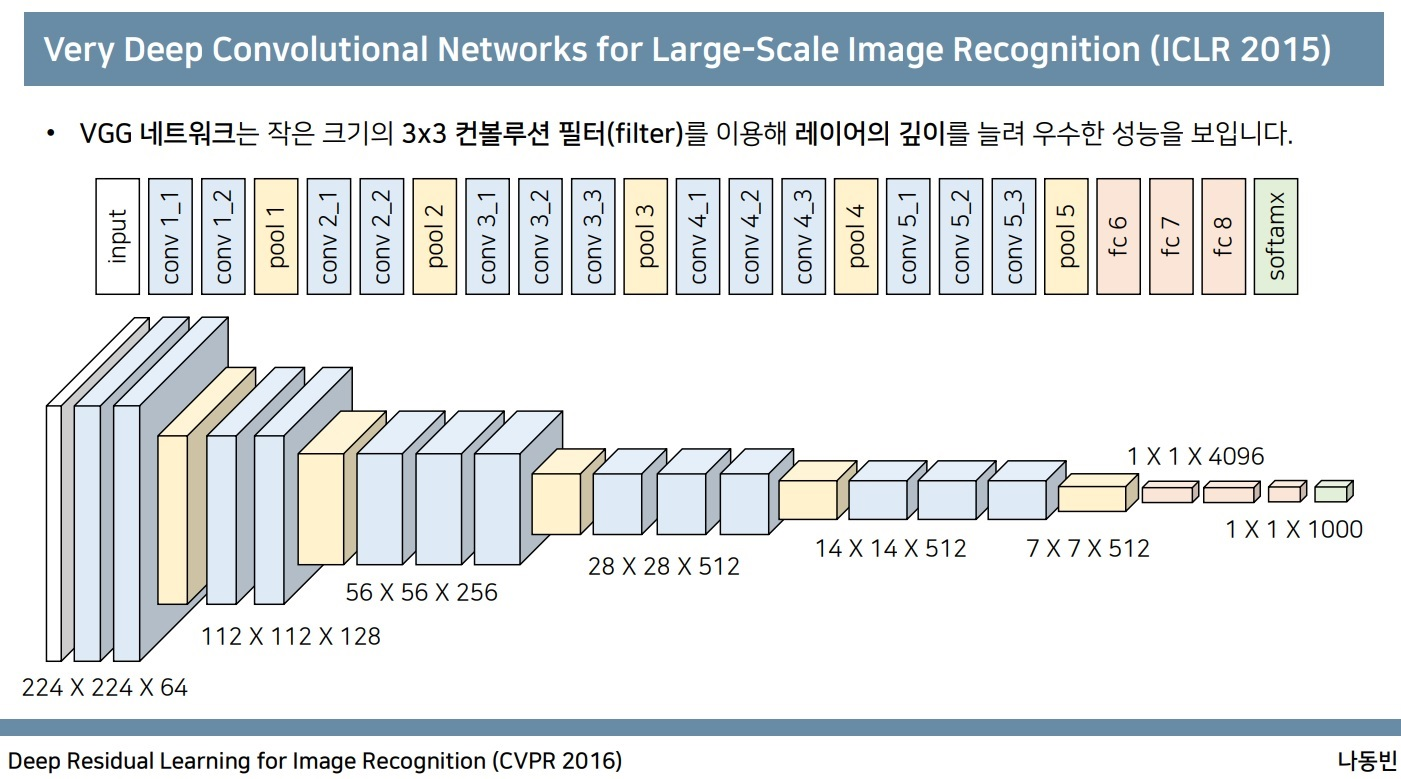

층이 많을수록 좋을까? 아니다. (얼마정도의 층이 좋을까? 위 논문 발췌 내용에서 보면...)
<br>
1. 딥러닝에서 층이 너무 많으면 오히려 성능이 낮아지는 현상 발생 → 이미지 전체가 픽셀 하나로 압축될수도...<br>
2. 오차 역전파를 통해 가중치를 업데이트할 때, 신경망 앞쪽에 올수록 신경망 뒷쪽의 기울기가 누적되어 곱해짐. 뒷쪽 기울기가 0에 까까우면 역전파되는 값이 0에 가까워지고 너무 크면 역전파 값은 점점 더 커짐. 특히 sigmmoid 함수.<br>
※ CH2, 2.6 활성화 함수로 기울기 소실 예방하기
<br>
예시) 아래 그림을 보면 층이 많다고 해서 overfitting 문제가 발생하지않고 오히려 성능 저하가 발생한다.<br>
단, 이 실험을 행한 사람들은 gradient vanishing 문제는 아니고 low convergence rates(epoche, 수렴난이도 척도)

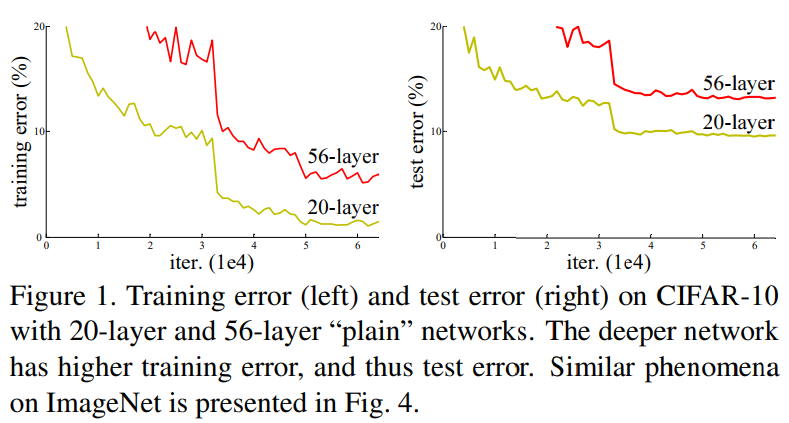

ResNet을 적용했을 때 성능 비교를 위해 Training error(이미 알고있는)로 성능 비교
→ early stage에서 더 빠르게 수렴하는 것을 확인 가능

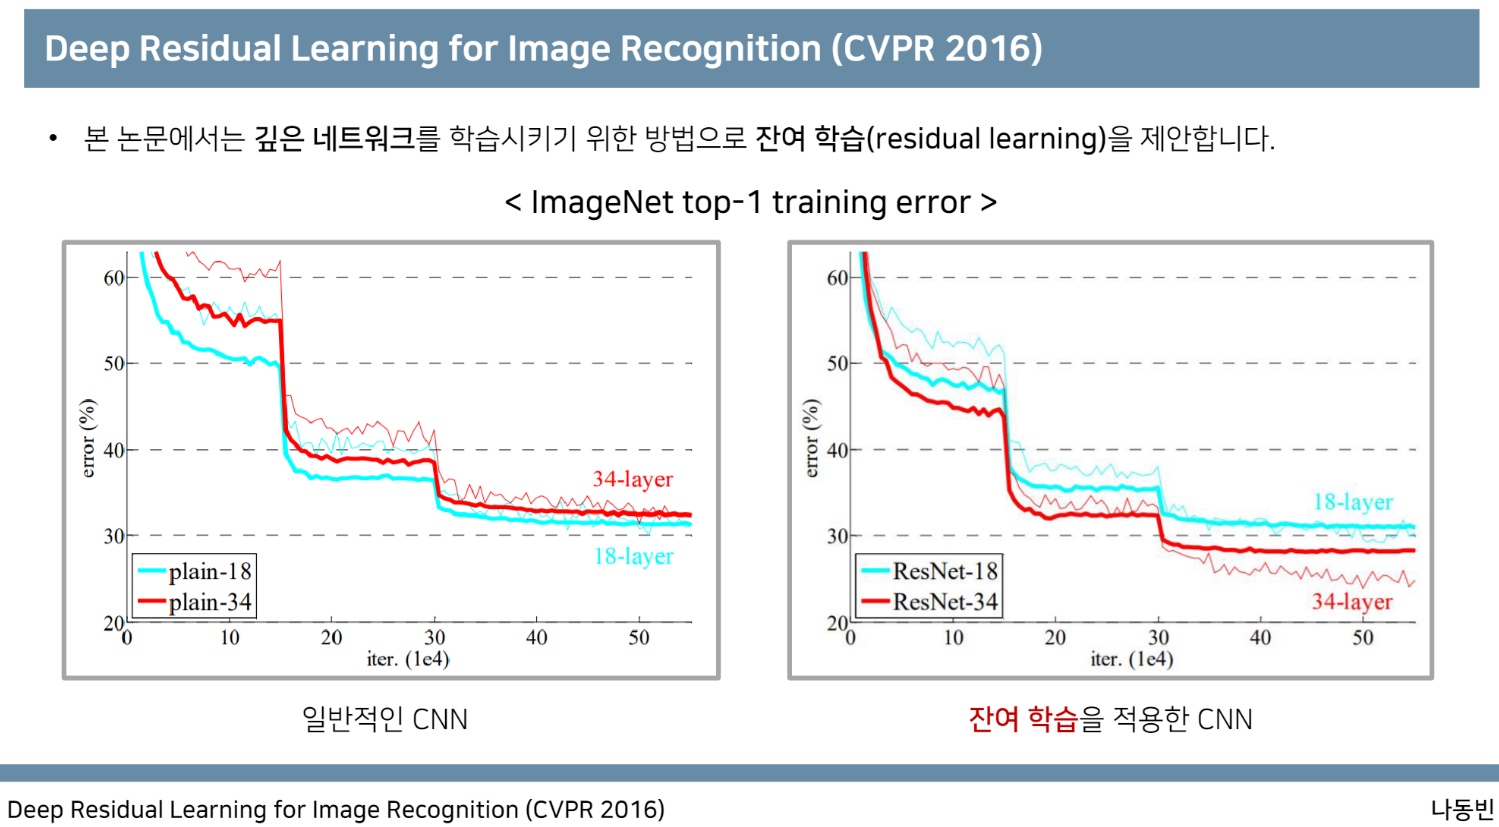

## 그러면 ResNet은 어떻게 Layer를 늘릴 수 있게 하였나?

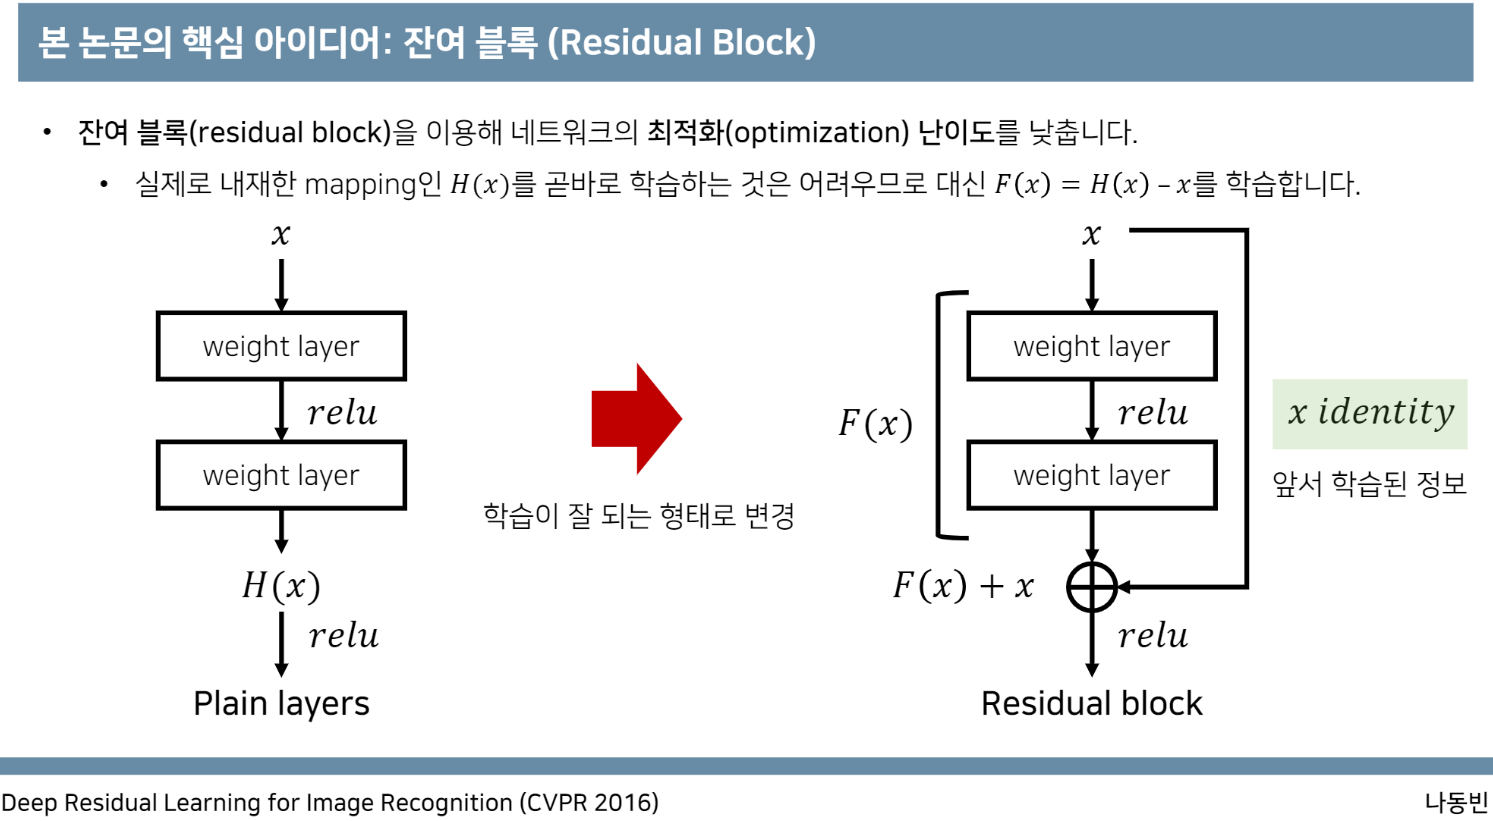

1. 모델의 깊이가 깊어질수록 학습이 어려움 → 잔여 블록(Residual block) 적용하여 학습이 잘 되도록(optimation 난이도 낮춤)   *논문 Abstract에서 언급
<br>
스킵 커넥션 or shotcut 커넥션 적용 : 입력값을 hidden layer 출력과 더해줌
<br>
최적화 필요 함수 H(x) = F(x) + x<br>
F(x) = H(x) - x<br>
스킵 커넥션이 없는 학습은 H(x) 최적화, ResNet은 F(x)의 최소화<br>
학습 목표가 생기면 쉬워진다. → 기존 학습은 알 수 없는 지점인 최적화 점을 향해갔지만 스킵 커넥션을 사용하면 F(x)를 0으로 만드는 목표가 생김<br>
H(x) = x → Identity mapping<br>

(좀더 명확히 이해할 필요.. : 변수 optimize하고 identity function하고 개념적으로 다르지 않은가...)
"Let us consider a
shallower architecture and its deeper counterpart that adds
more layers onto it. There exists a solution by construction
to the deeper model: the added layers are identity mapping,
and the other layers are copied from the learned shallower
model. The existence of this constructed solution indicates
that a deeper model should produce no higher training error
than its shallower counterpart."<br>
"We hypothesize that it
is easier to optimize the residual mapping than to optimize
the original, unreferenced mapping. To the extreme, if an
identity mapping were optimal, it would be easier to push
the residual to zero than to fit an identity mapping by a stack
of nonlinear layers."(논문 인용)<br>
2. 기울기 소실 문제(층이 깊어짐에 따라 입력층에 가까운 층들의 가중치에 대한 기울기 값이 0에 가까워지는 현상) 해결 → 스킵 커넥션<br>
스킵 커넥션 : 은닉층을 거치지 않은 입력값을 은닉층의 출력값과 더하는 구조, 자기 자신을 미분하면 1이 나오기 때문에 신경망의 출력 부분에 입력을 더하는 방식으로 기울기를 최소 1로 확보<br>
H(x) = F(x) + x (그림 추가)

##추가 설명
실제 케이스에서 optimal 솔루션이 identity mapping과 동일할 수는 없다. 하지만 이러한 가정이 문제를 쉽게 해결하는 방안이 될 수 있다.
만약 이러한 가정이 없다면 매번 새로운 함수에 대해 학습을 진행하여야 한다.
결과적으로 residual function을 사용한 결과가 실험적으로 증명되었다.

F는 residual mapping, x는 indentical mapping(shortcut function),
biase는 고려하지 않음.
linear projection Ws를 x에 곱해줌으로써 F와의 dimension을 맞춰줌
※ 교재에서는 다운샘플(Downsample)로 언급

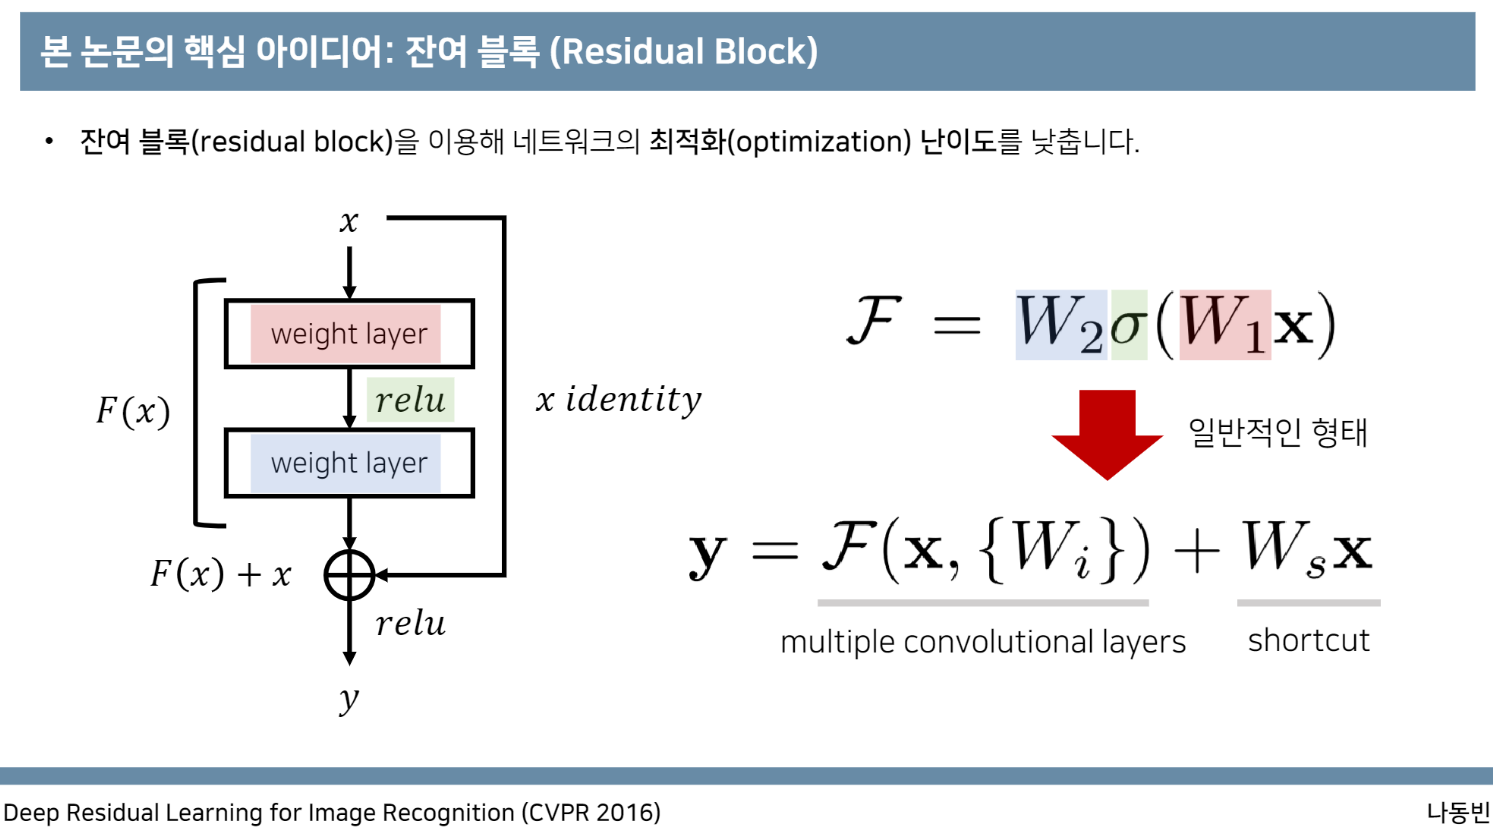

# ResNet 적용시 실험 결과

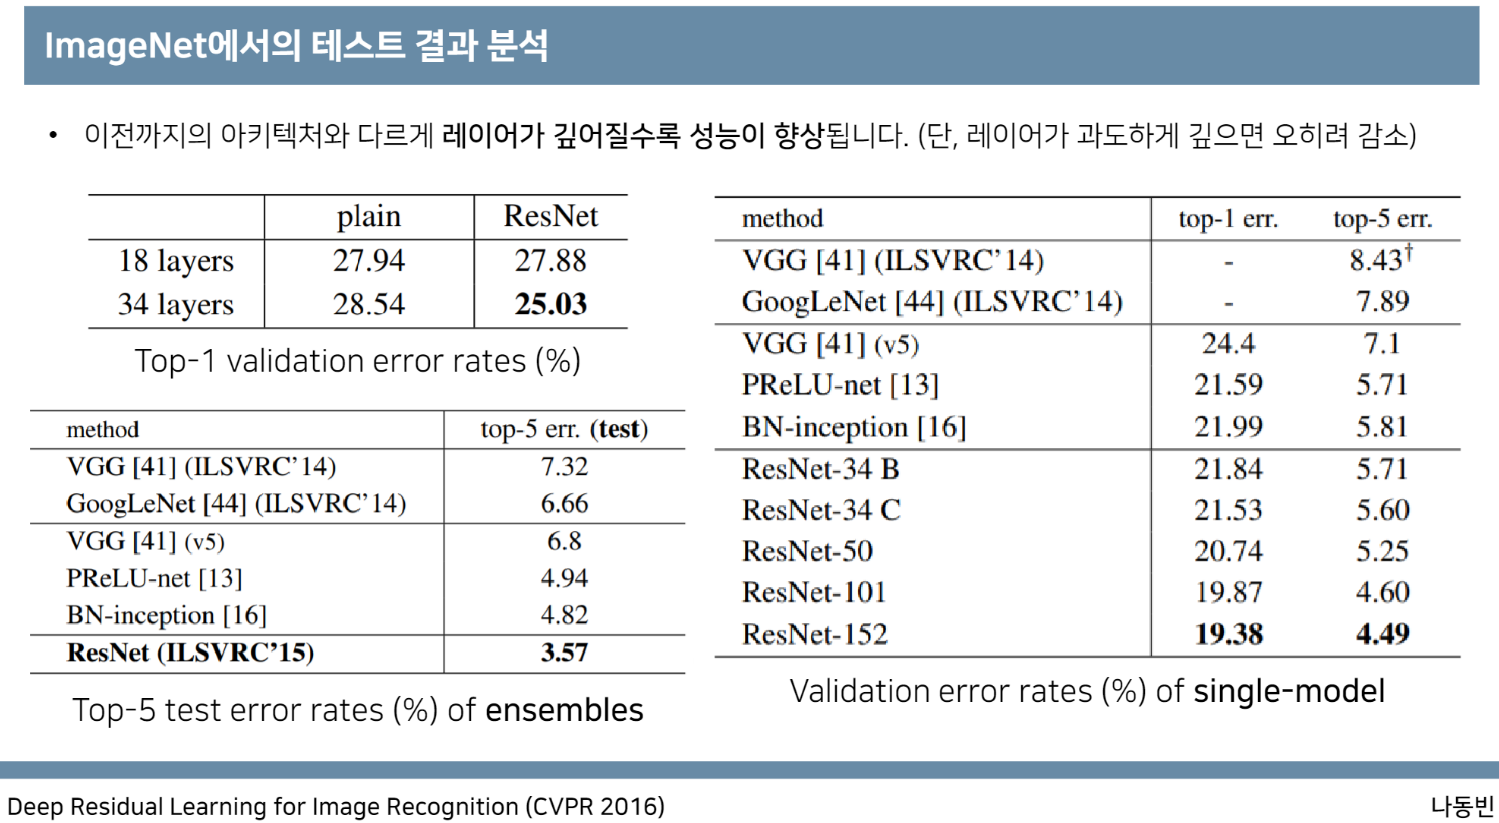

## 실험에 사용된 모델 예시

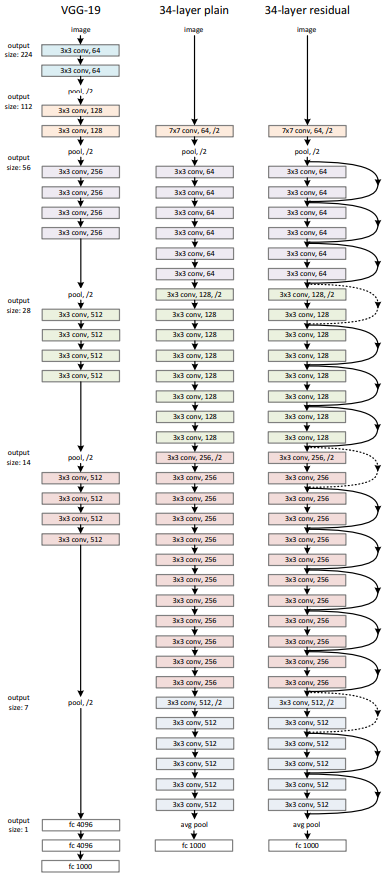

*여기서는 실험 모델의 큰 그림만 보여드리니
구체적인 구현 방법과 training 방법은 논문 참고해주세요.

논문에서는 보여준 결과
- 학습이 쉬웠다.(easy to optimize)
- 깊어질 수록 높은 accuracy를 보였다.
- CIFAR-10 등을 이용한 결과를 보여줌으로써 일반적인 데이터에서도 적용된다는 것을 보여주었다.

※ 논문에는 bottleneck building block은 복잡도는 낮추기 위해 제안되었으며 작은 커널을 사용하고 파라미터 수를 줄이는데 기여할 수 있다고 함
※ 논문 상 CIFAR-10 실험 및 object detection 등은 금일 설명에서 내용 생략

# ResNet 장단점

ResNet 장점<br>
1. 층을 깊게 쌓을 수 있다.
2. VGG에 비해 학습이 안정적.
3. 기울기 소실 문제 어느 정도 해결.<br>


ResNet 단점<br>
1. 가중치가 늘어나 계산량이 많아짐.
2. VGG에 비해 오버피팅이 일어나기 쉬움.

# 논문상 ResNet 구조와 교재의 ResNet 구조는 다소 다름
# 실습 내용은 교재를 따라서 진행
# 교재 ResNet은 Batch Normalization(배치 정규화)가 추가됨

→ 교재 확인(P150)

##배치 정규화<br>
###요약<br>
각 층마다 값의 범위가 달라지는 경우인데,<br> 학습할 때 모든 데이터를 한번에 이용하지 않고 배치단위로 나눠서 학습하게되는데 배치 간의 데이터 분포가 달라서 생기는 현상<br>
배치 정규화층을 삽입하여 각 층에서 값의 불균형 분포를 일정하도록 처리<br> (이미지 삽입)

가중치 소멸(Gradient Vanishing), Gradient Exploding 해결을 위한 접근 방법 중 하나<br>

※ 논문 : https://arxiv.org/pdf/1502.03167.pdf<br>
※ 논문 리뷰 사이트
- https://enfow.github.io/paper-review/neural-network/2020/10/04/accelerating_deep_network_training_by_reducing_internal_covariate_shift/<br>
https://dlaguddnr.tistory.com/19<br>
https://goodjian.tistory.com/entry/%EB%B0%B0%EC%B9%98-%EC%A0%95%EA%B7%9C%ED%99%94-%EB%85%BC%EB%AC%B8-%EB%A6%AC%EB%B7%B0-Batch-normalization
- https://shuuki4.wordpress.com/2016/01/13/batch-normalization-%EC%84%A4%EB%AA%85-%EB%B0%8F-%EA%B5%AC%ED%98%84/
- Youtube : https://www.youtube.com/watch?v=58fuWVu5DVU&t=2949s
- Youtube2 : https://www.youtube.com/watch?v=m61OSJfxL0U
- 기타 참고 : https://heytech.tistory.com/438

##먼저 데이터 정규화의 필요성부터..

데이터 정규화 : Feature 데이터 값의 범위를 조정하는 과정, Feature scaling or Data scaling<br>
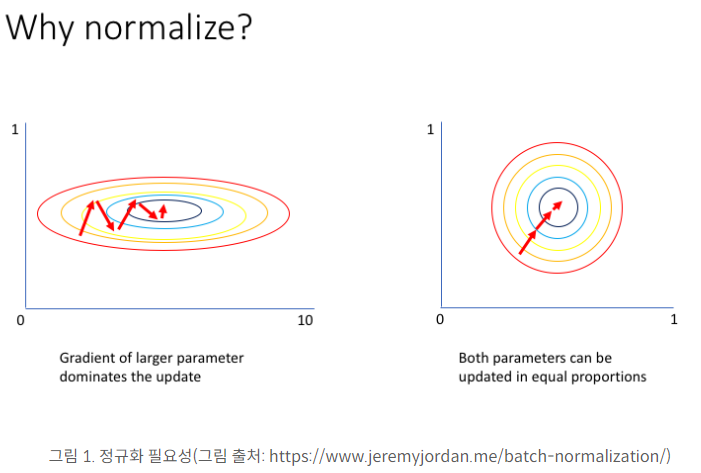
<br>
데이터 간 편차가 큰 Feature 위주로 학습이 진행,
모델 학습시 모든 Feature마다 파라미터가 유사한 중요도를 가지고 개선되기 때문에 최적화 과정이 개선되는 효과 기대=학습 속도가 개선된다...<br>
정규화하면 learning rate 사용이 쉬워진다...

### 또 다른 이유

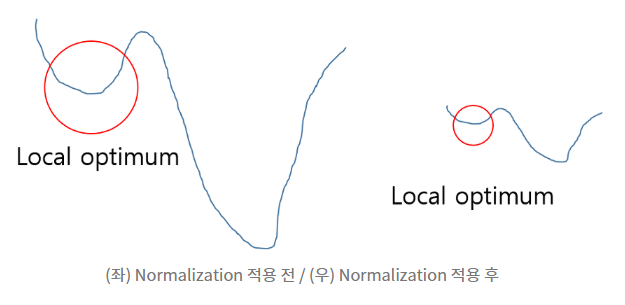

저점을 찾을 때 그래프를 전체적으로 이해하지 못하여 global optimum 지점을 찾지 못하고 local optimum 에 머물러 있게 되는 문제가 발생하게 된다. 이러한 문제점은 정규화 하여 그래프를 왼쪽에서 오른쪽으로 만들어, local optimum 에 빠질 수 있는 가능성을 낮춰주게 된다.

###배치 정규화 장점<br>
1. 학습 속도 빠르게...(성능 유지 or 향상하여)
2. 가중치 초기화에 대한 민감도 감소 : 하이퍼 파라미터 세팅이 덜 정교하더라도 대체로 모델이 잘 수렴함.
3. 모델 일반화 효과 : 테스트 모델 적용시 정확도가 더 상승


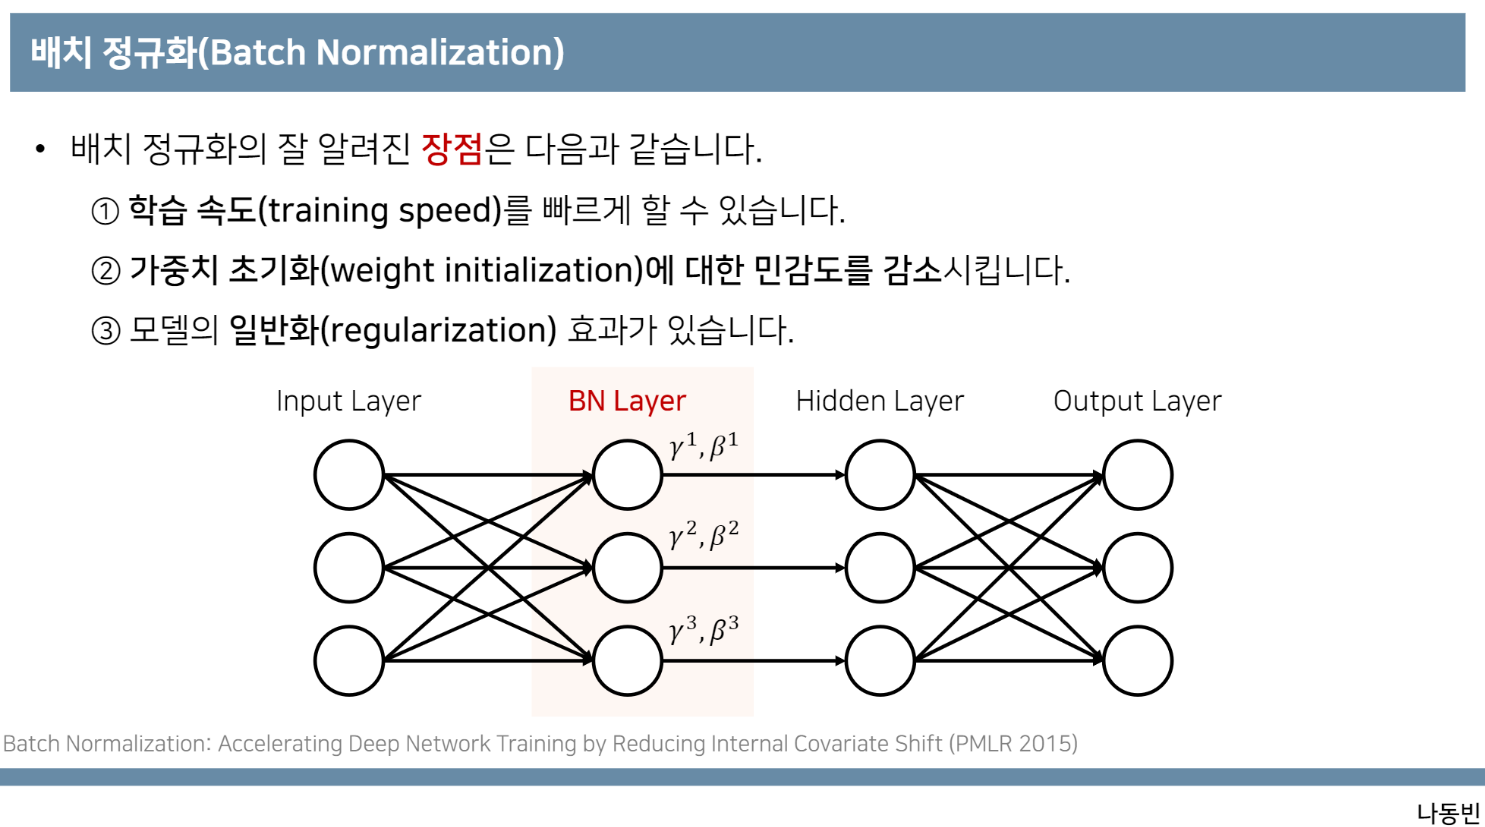

##정규화 방법 : 입력 정규화 vs 화이트닝
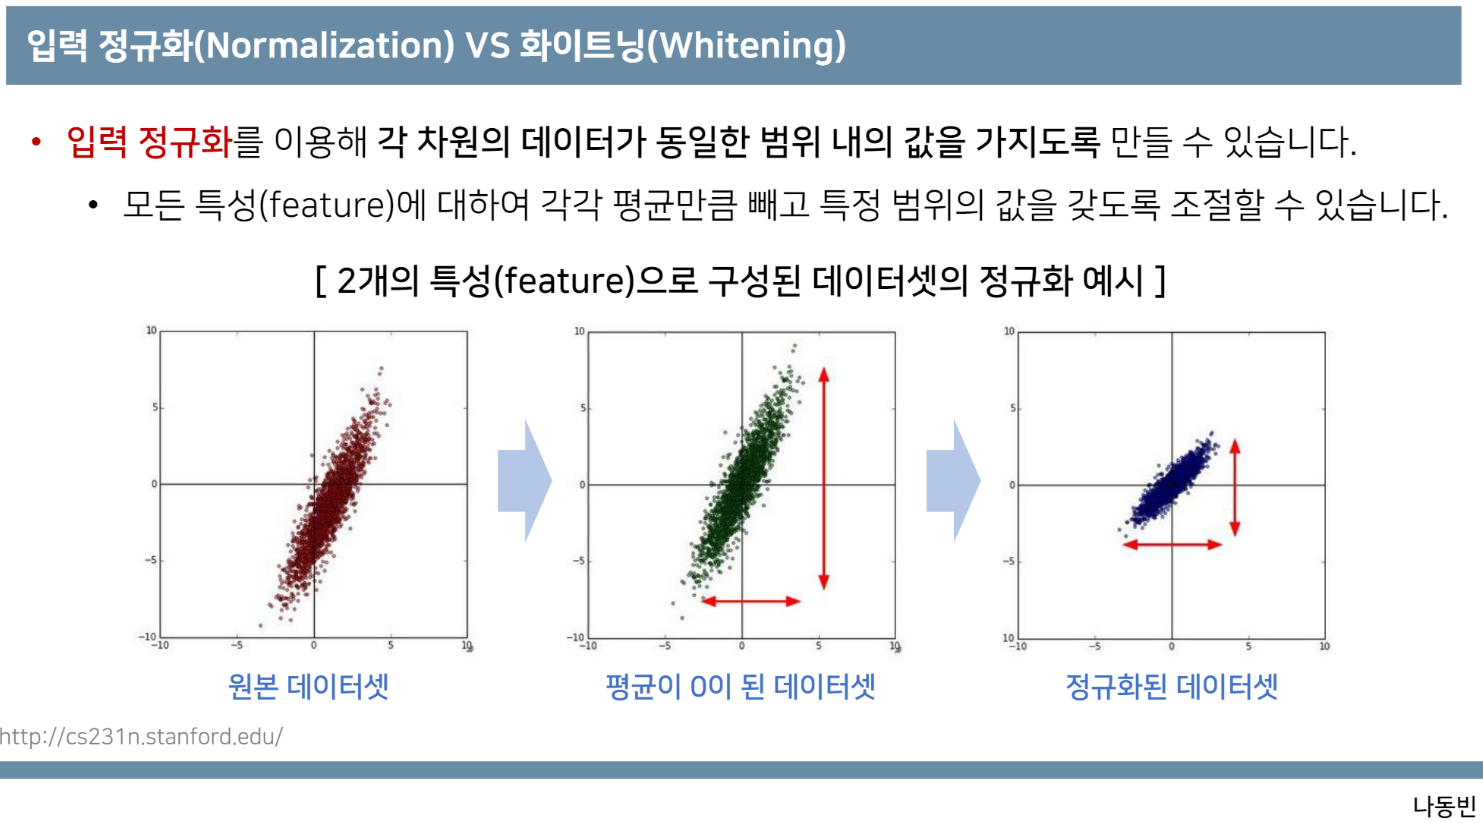
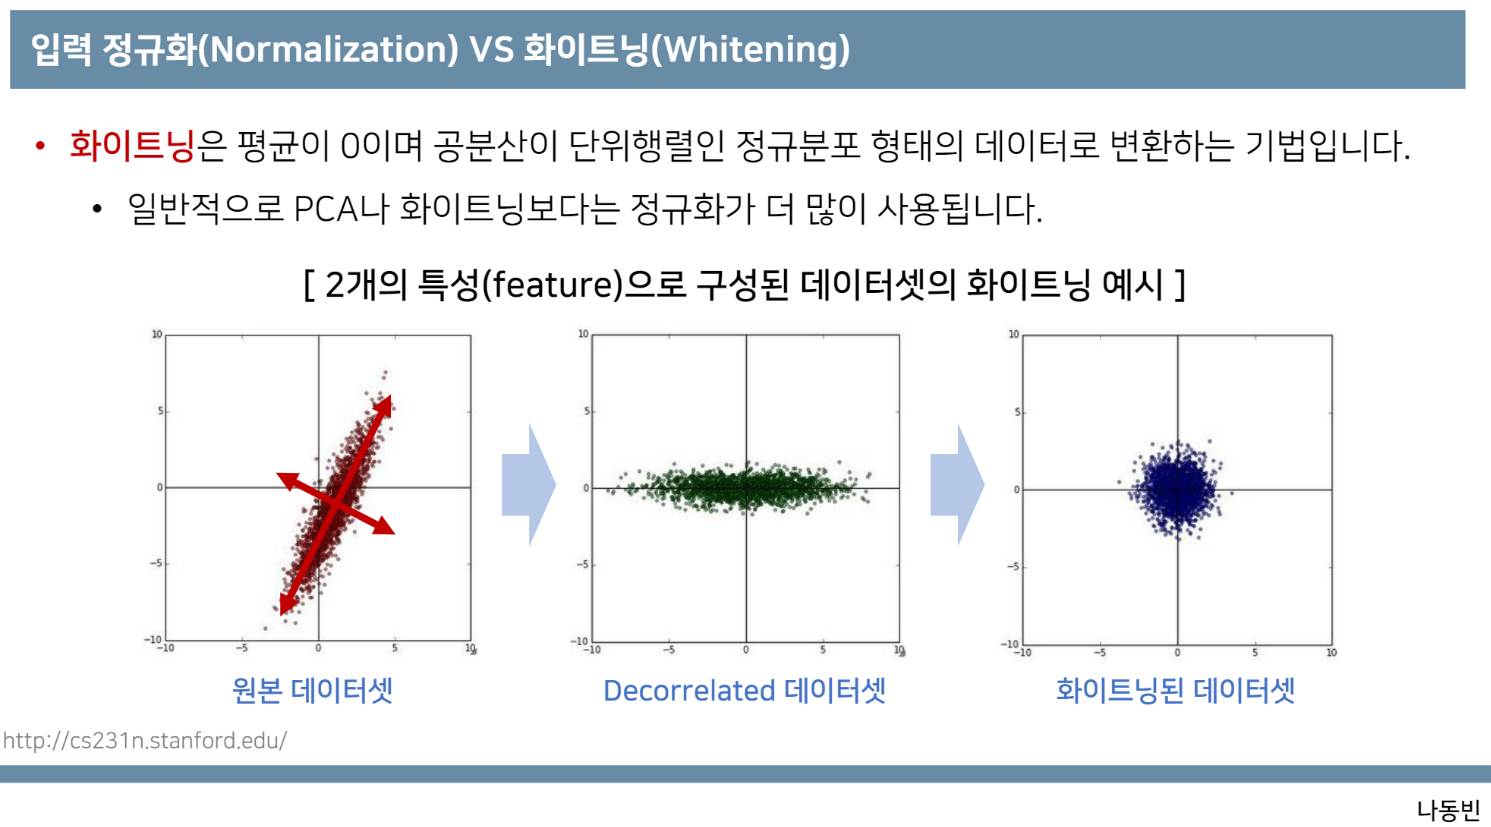
※ 공분산 단위행렬 → 피쳐가 연관성이 없다

#Hidden layer의 데이터 분포
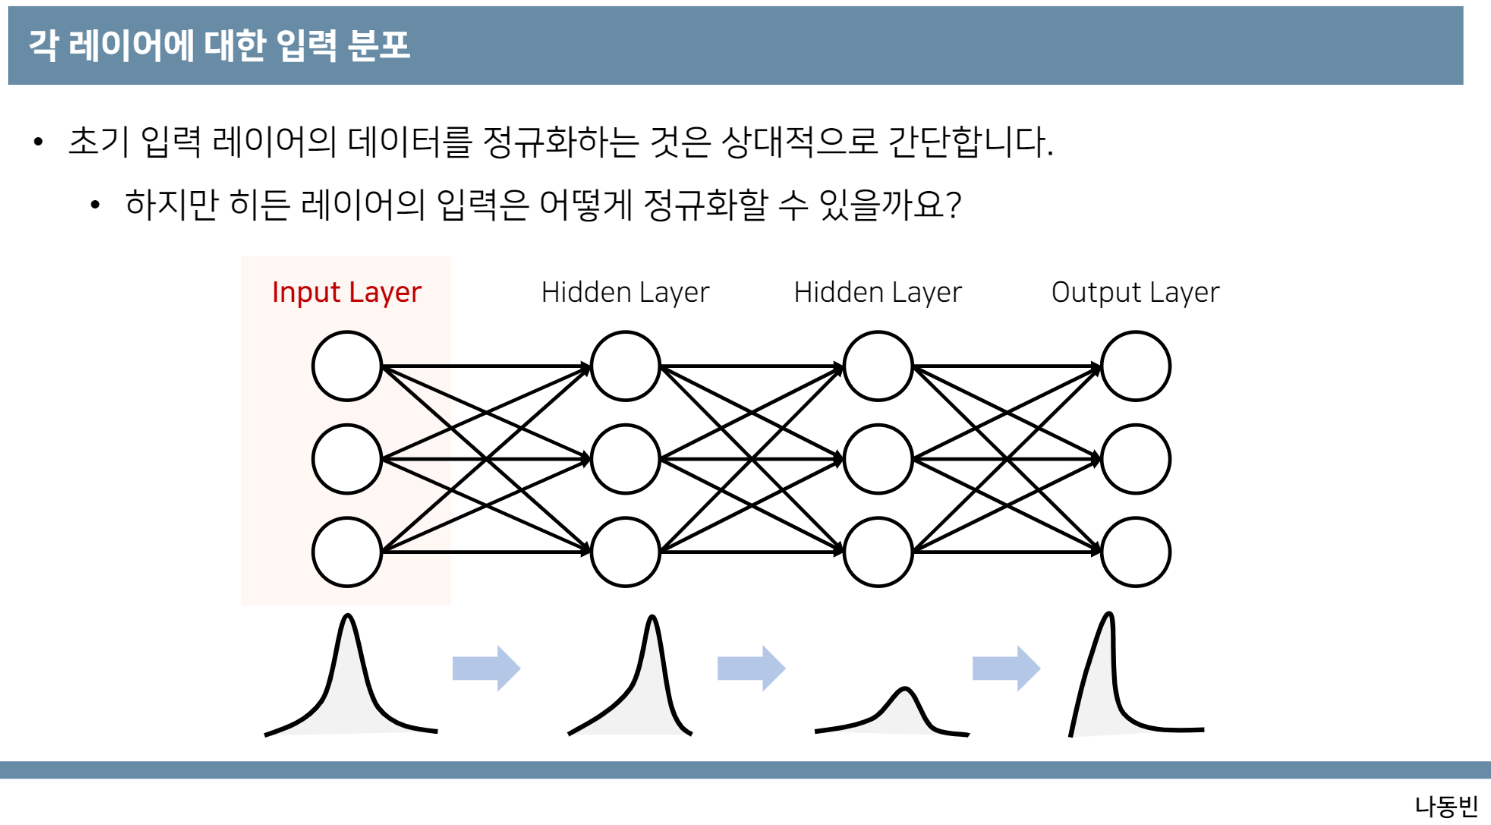

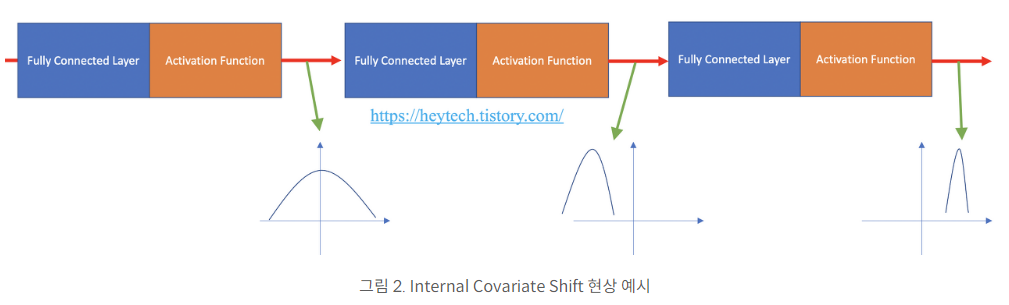

# Hidden Layer의 배치 정규화

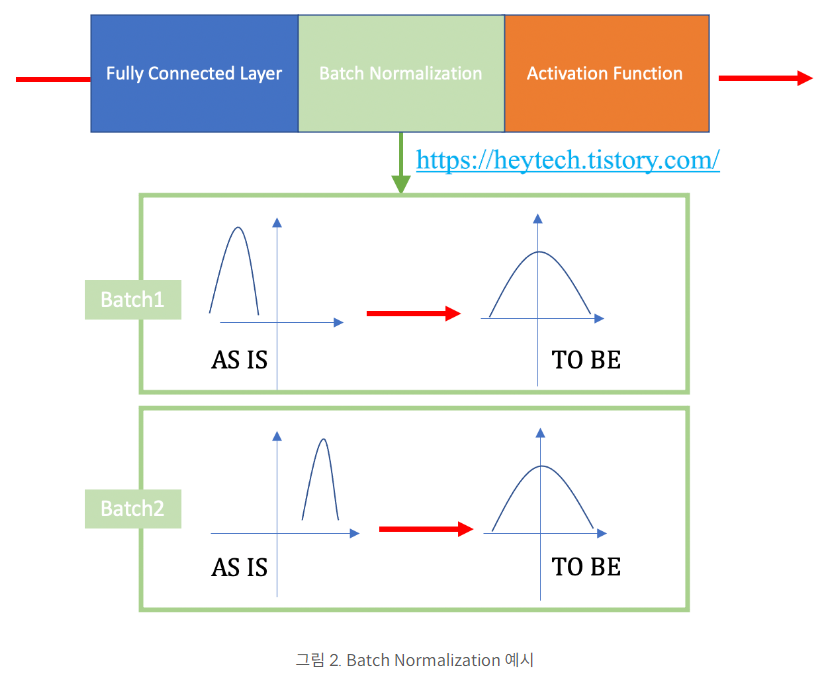

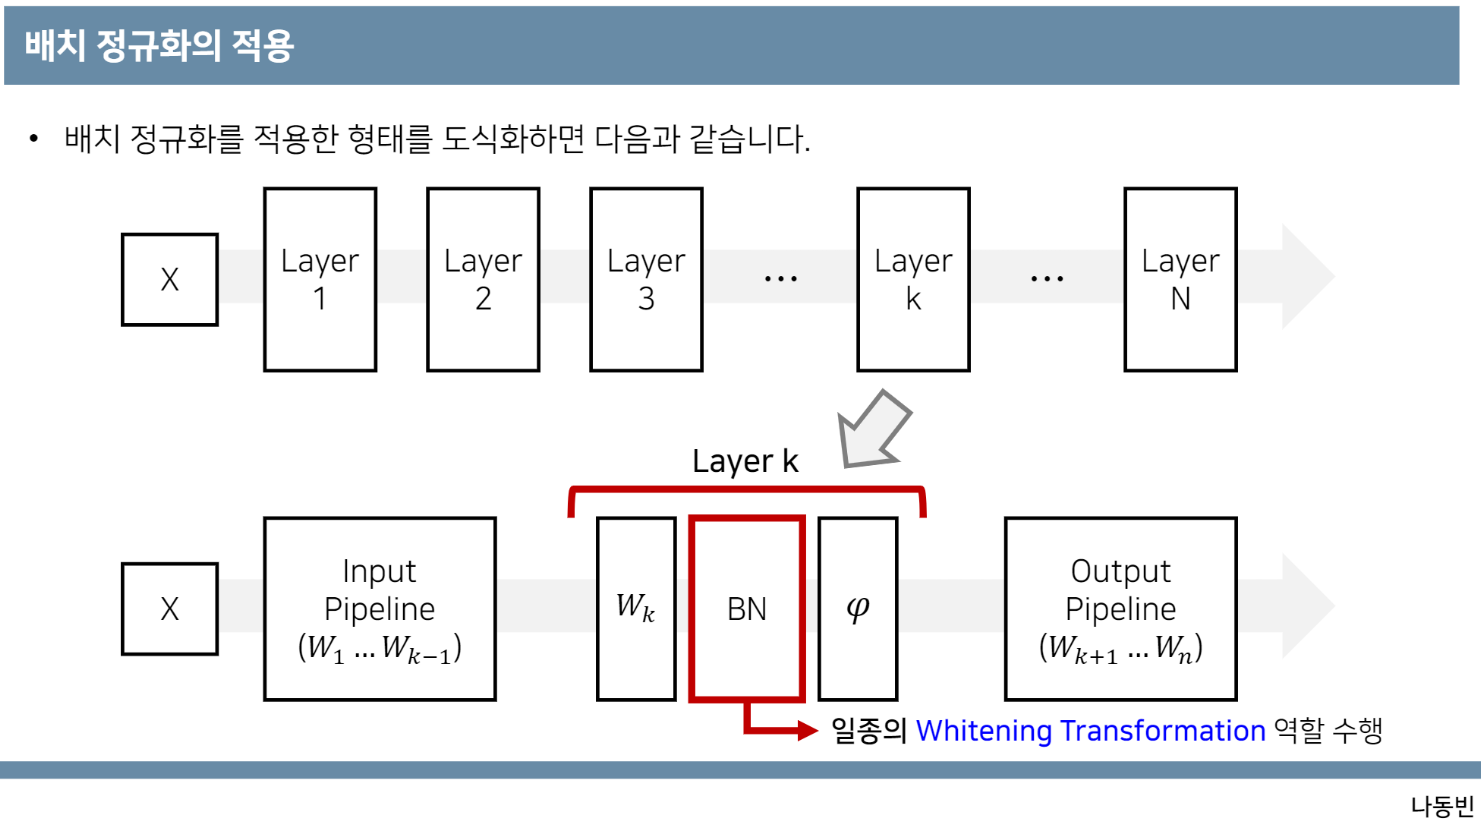


Batch normalization layer와 Activation layer의 순서가 정해져있지는 않지만 논문에서는 Activation layer 앞에 B/N 위치<br>
아래에서 보이는 γ와 β에 대해서 학습을 진행

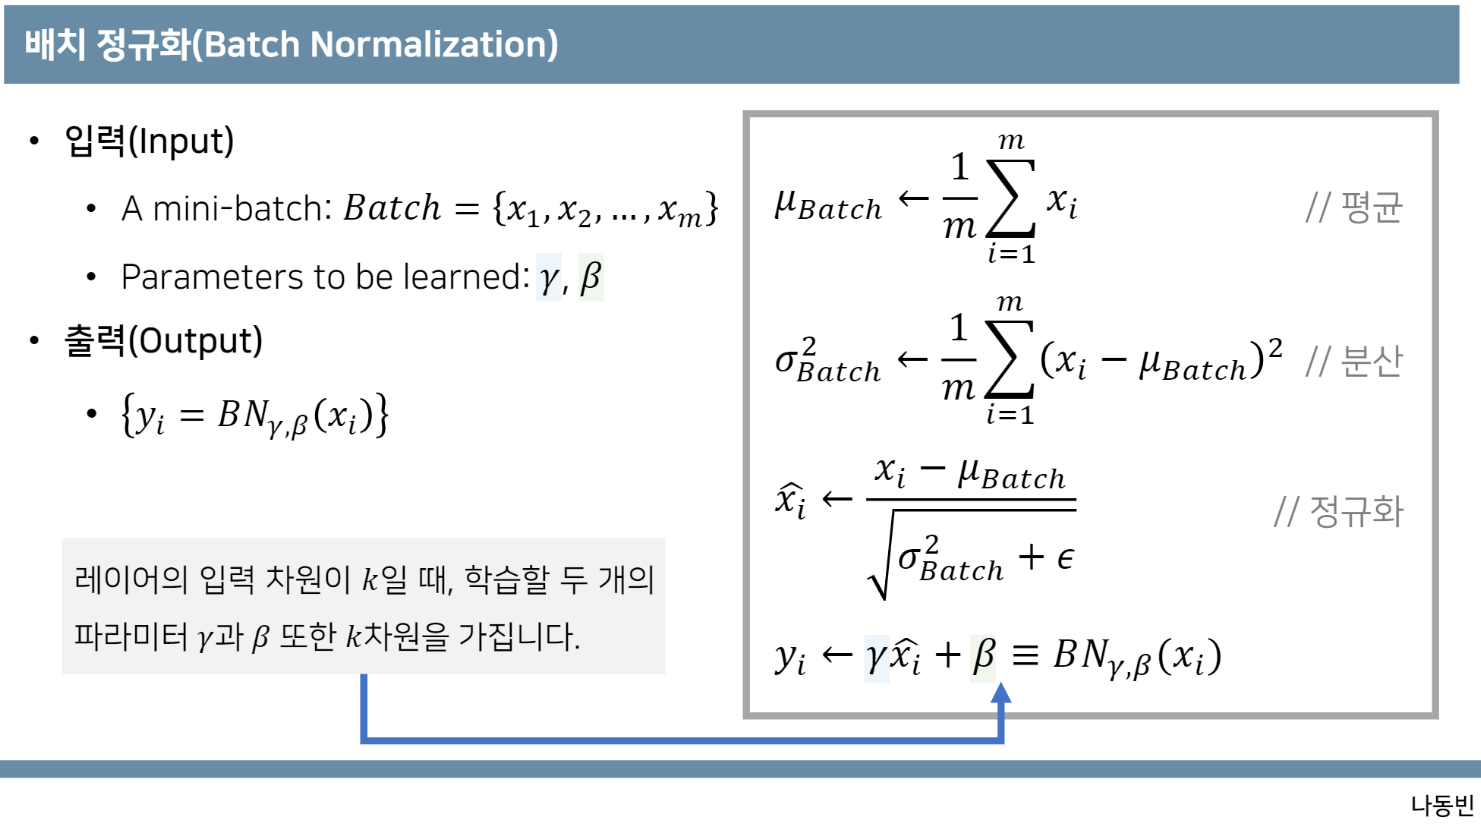


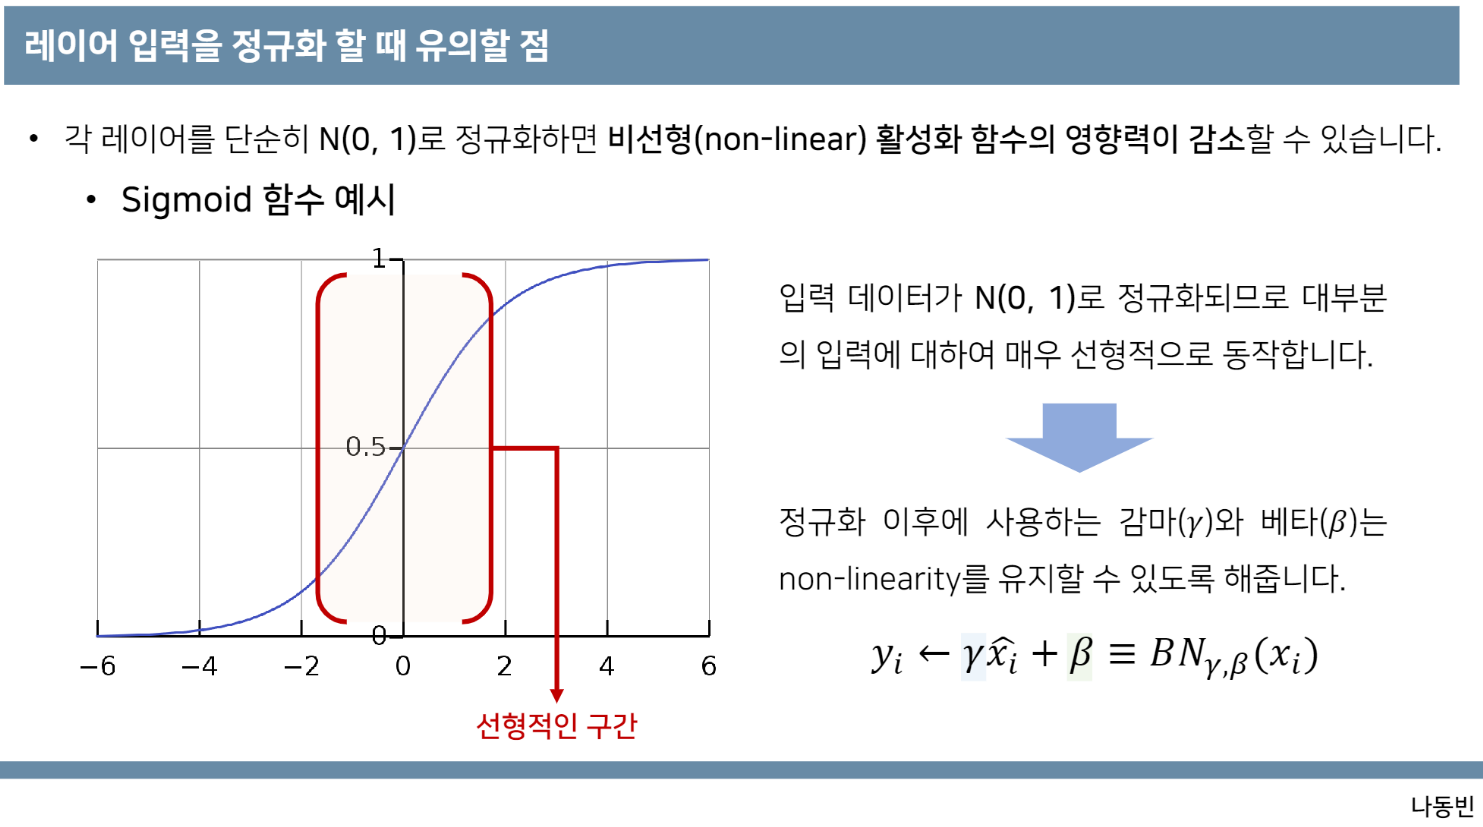

정규화로 평균 0, 분산 1로 만든 후 γ와 β로 뿌린다...
정규화 이후 사용하는γ와 β non-linearity 유지 역할

## 중요. Activation func.이 Sigmoid일 경우


*   입력값이 충분히 크거나 작을 경우 gradient vanishing이 발생하는데 정규화를 통해 해결 가능
*   입력값이 0 근처일 경우(위 예시 처럼) 비선형성이 없어지는데 정규화 이후의 γ와 β로인해 비선형성을 유지 가능



#배치 정규화로 성능 향상 실험 결과

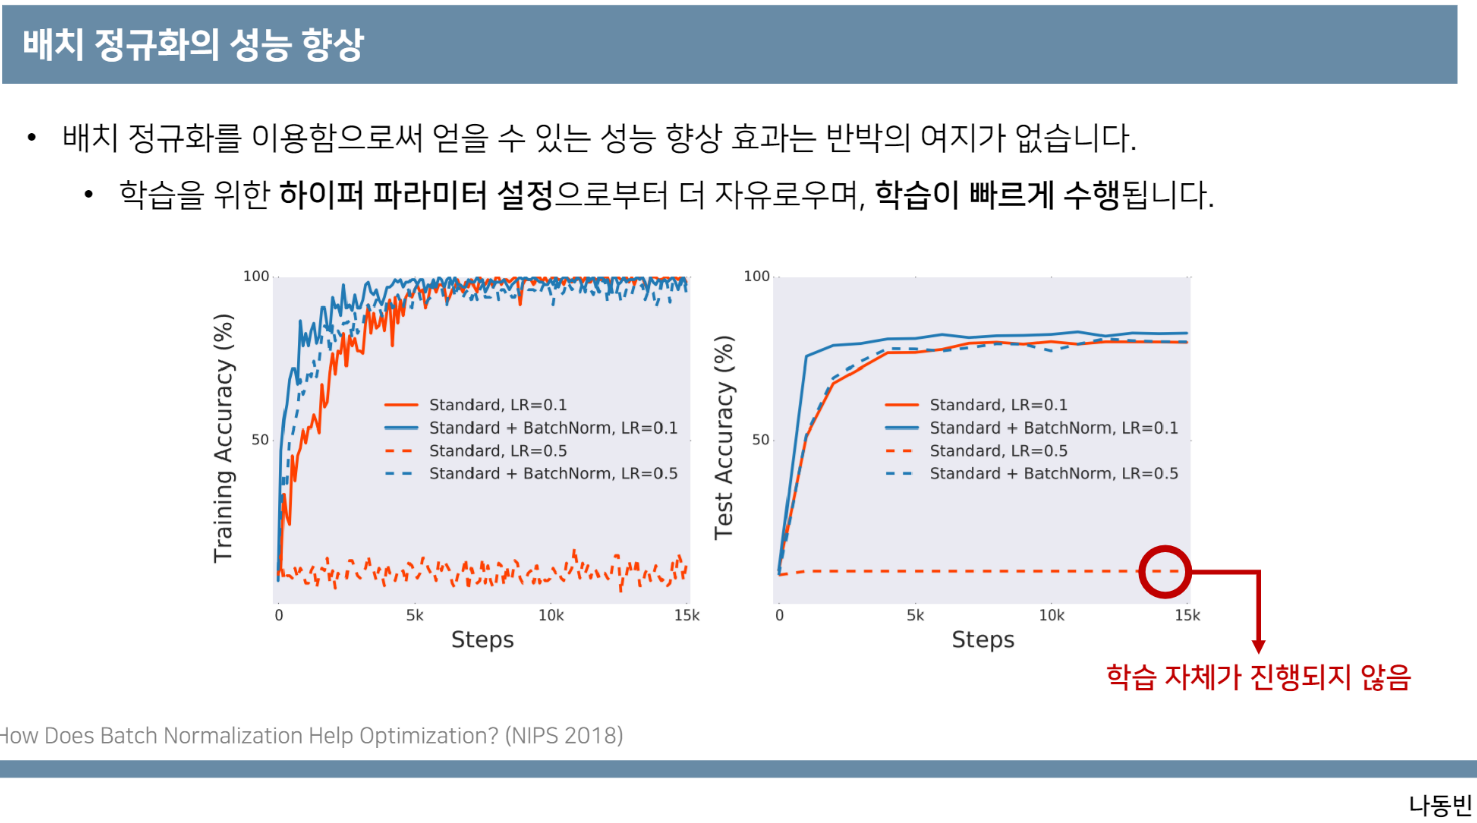

# 참고. 트레이닝에서는 미니 배치의 평균, 분산을 적용하지만,테스트 할 때는 미니 배치 전체의 평균 분산 적용 moving average

# 추가. 배치 정규화 이해
기존 배치 정규화는 Internal Covariate Shift문제를 해결하기위해 소개됨

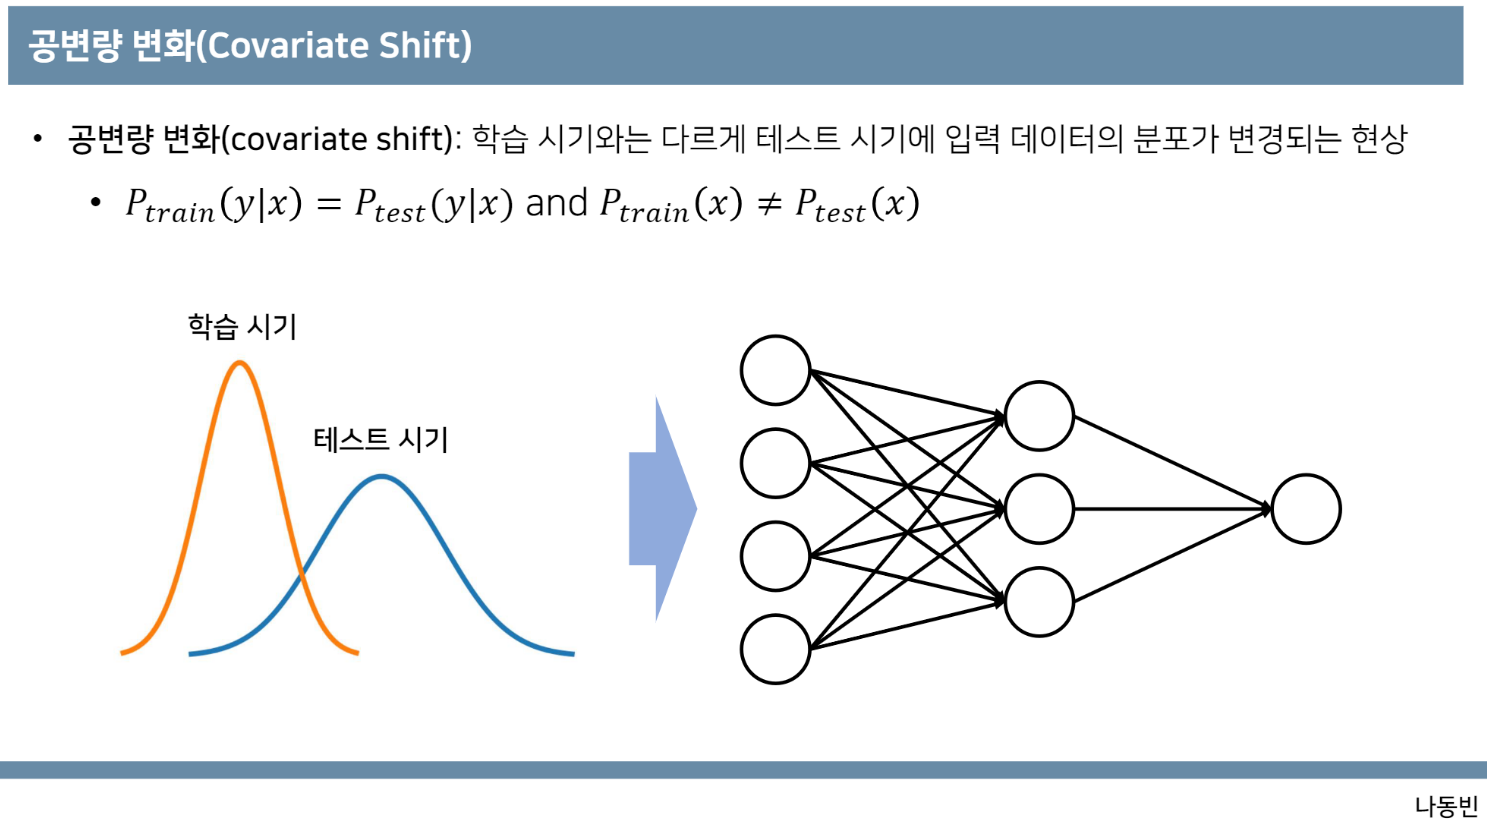


Internal Coavariate Shift : 모델 학습 과정에서 Layer를 통과할 때마다 출력값의 데이터 분포는 Layer마다 다르게 나타나는 현상<br>
(이미지 추가)<br>
문제점 : Layer마다 동일한 학습률로 학습할 때, 데이터 분포가 Layer마다 다를 경우 학습 성능이 떨어지는 문제, Mini Batch 학습 시 Batch마다 출력 데이터 분포가 다르게 나타나 전형 예측 불가한 Gradient를 학습하게되어 학습 질 저하<br>

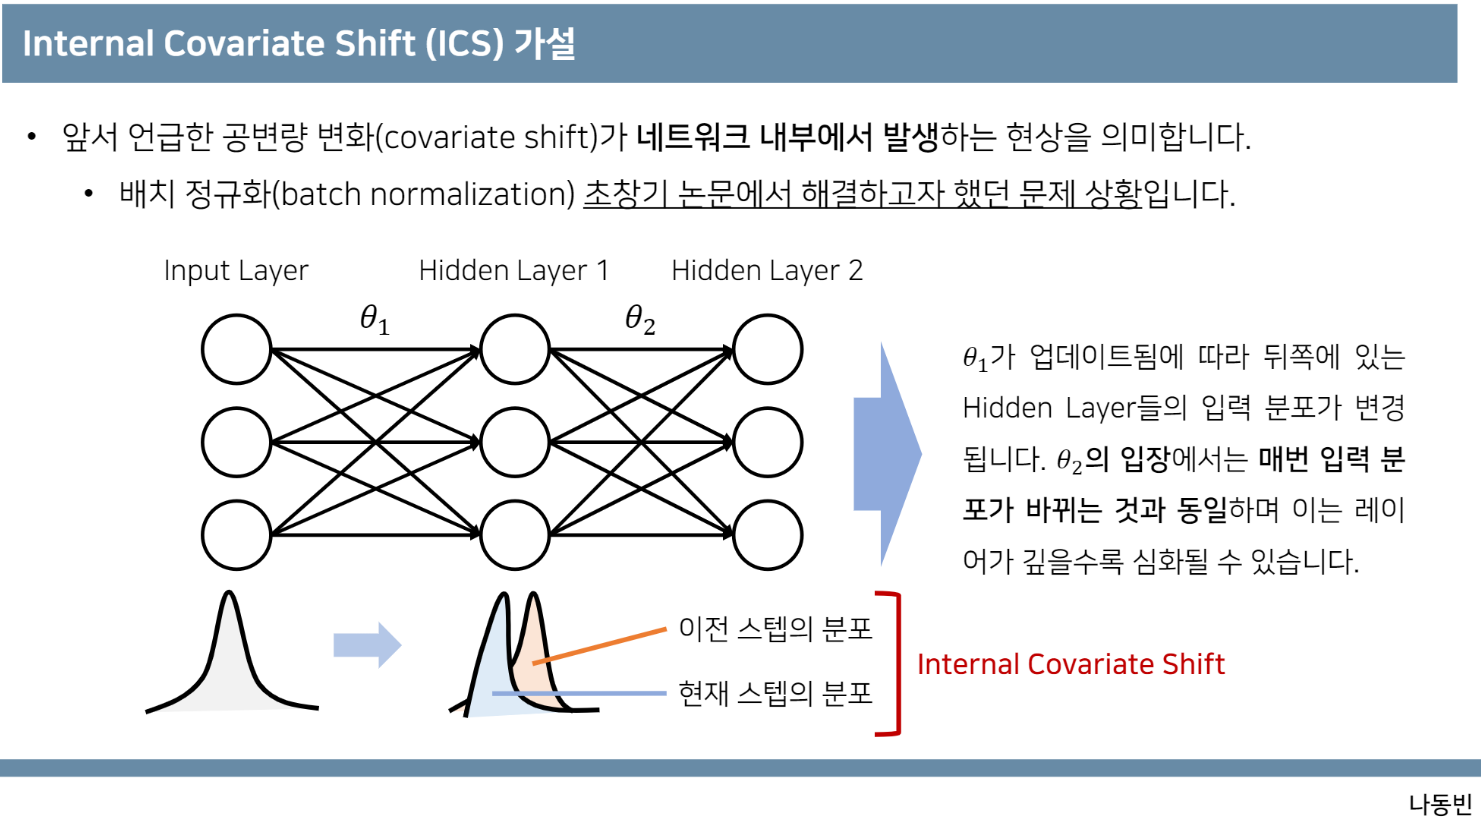

## 하지만 후속 연구에서는 배치 정규화의 효과와 ICS 감소와는 큰 상관이 없다고 주장됨
## 그래도 배치 정규화에 의한 성능 향상의 반박의 여지 없음


#그럼 왜 배치 정규화가 효과가 있나?<br>

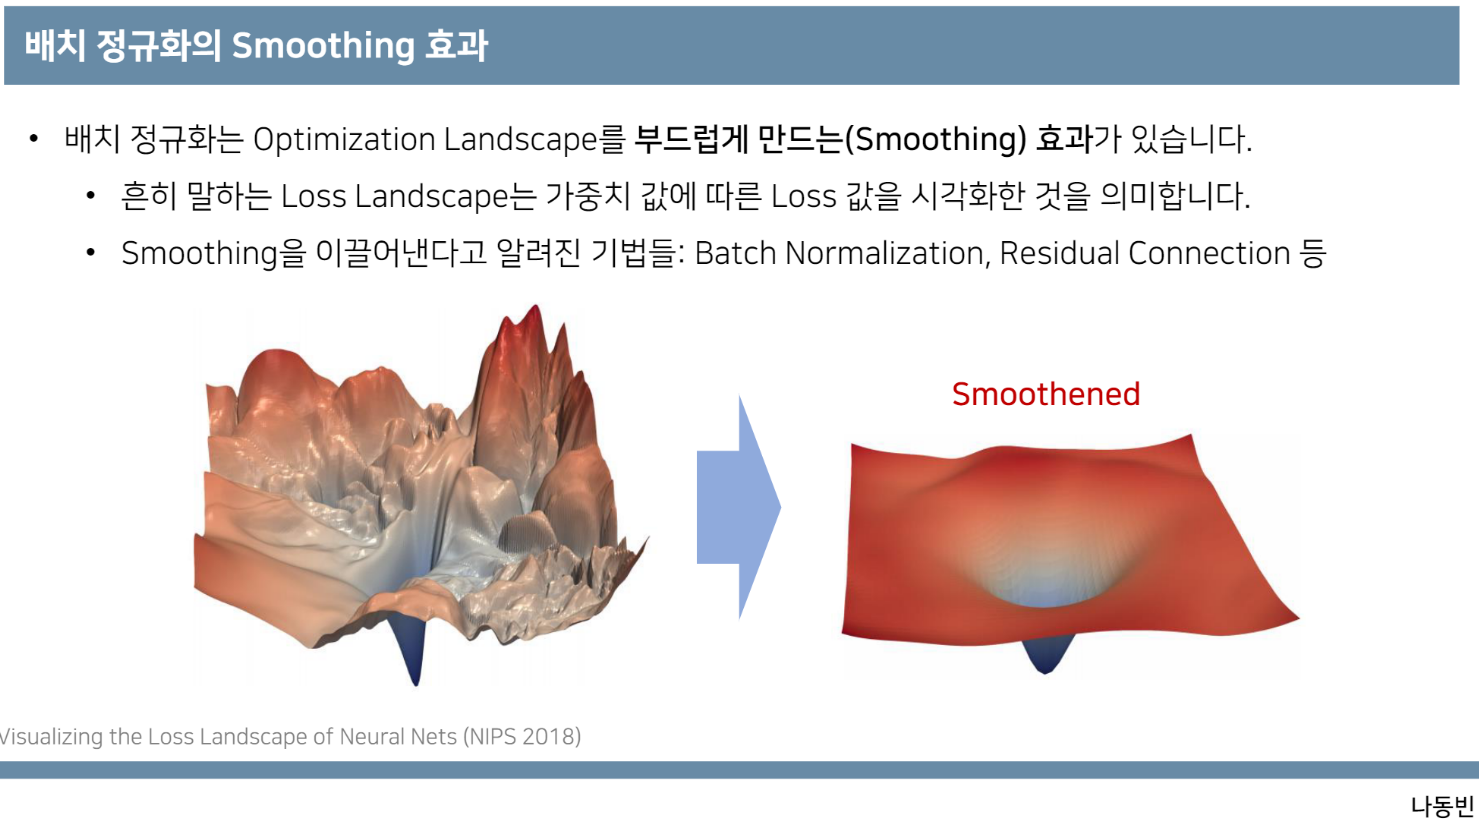

Lipschitzness가 향상...추가 설명 생략
<br>

학습 단계시 Batch Normalization<br>
(수식 추가)<br>
추론 단계시 Batch Normalization<br>
(수식 추가 및 설명 필요)

<br>

<br>

<br>

# 실습

------------------------------------------------------------------------------------------------------------------

스킵 커넥션 구현 → nn.Module 이용 (nn.Sequential은 데이터 흐름을 제어할 수 없기 때문에 간단한 구조에 적합, 데이터가 단순히 앞으로만 전달되는 간단한 구조에서만 사용)

## ResNet의 기본 블록

In [1]:
import torch
import torch.nn as nn

torch.nn : 파이토치에서 제공하는 neural network 모듈, 모든 신경망 모델의 Base Class, PyTorch로 만들어진 신경망 모델들은 nn.Module의 subclass<br>
(질문)<br>
import torch as nn<br>
import torch.nn as nn<br>
차이는?

일반적으로 PyTorch 신경망 모델로 쓰기 위해서는 아래 두 가지 조건 따라야...
1. torch.nn.Module을 상속
2. __init()__와 forward()를 override
  - __init()__ : 모델에 사용될 module(nn.Linear, nn.Conv2d), activation function(nn.functional.relu, nn.functional.sigmoid)등 정의
  - forward() : 모델에서 실행되어야하는 계산을 정의 cf) backward계산은 backward()를 이용하면 Pytorch가 알아서 해줌


nn.Module override를 쉽게 얘기하면...
- __init__(self) : 내 신경망 모델에 사용될 구성품들을 정의 및 초기화하는 메소드
- forward(self, x) : init에서 정의된 구성품들을 연결하는 메소드

참고
- PyTorch Layer 종류 : https://pytorch.org/docs/stable/nn.html#module
- PyTorch 함수 종류 : https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

#참고 : PyTorch 모델 기본 구조<br>

import torch.nn as nn<br>
import torch.nn.functional as F<br>
<br>
class Model_Name(nn.Module):<br>
    def __init__(self):<br>

        super(Model_Name, self).__init__()
        self.module1 = ...
        self.module2 = ...

        """
        ex)
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)
        """

    def forward(self, x):

        x = some_function1(x)
        x = some_function2(x)

        """
        ex)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        """
        return x

model = Model_Name()

# 실제 코드

In [2]:
# BasicBlock이 nn.Module의 상속을 받아 기본적인 기능을 사용할 수 있도록 정의
class BasicBlock(nn.Module): # 여기서 nn.Module을 상속받음
  # init는 neural network의 구성요소들을 정의
  def __init__(self, in_channels, out_channels, kernel_size=3):
    # super()는 상속받은 부모 클래스
    # 부모의 클래스를 __init__()를 수행한다는 것은 부모의 생성자를 불러준다는 것
    super(BasicBlock, self).__init__() # nn.Module과 그 부모가 있다면 모두 상속

    # ❶ 합성곱층 정의
    self.c1 = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, padding = 1)
    self.c2 = nn.Conv2d(out_channels, out_channels, kernel_size=kernel_size, padding = 1)
    self.downsample = nn.Conv2d(in_channels, out_channels, kernel_size = 1)

    # ❷ 배치 정규화층 정의 : 채널 수는 앞단의 출력 채널 수와 동일
    self.bn1 = nn.BatchNorm2d(num_features=out_channels)
    self.bn2 = nn.BatchNorm2d(num_features=out_channels)

    self.relu = nn.ReLU()

  # def forward는 호출될 때 수행하는 연산 정의
  def forward(self, x): # 순전파
    # ❸스킵 커넥션을 위해 초기 입력을 저장
    x_ = x

    x = self.c1(x)
    x = self.bn1(x)
    x = self.relu(x)
    x = self.c2(x)
    x = self.bn2(x)

    # ➍합성곱의 결과와 입력의 채널 수를 맞춤
    # 입력 이미지 3 채널 < Feature map 채널 수
    x_ = self.downsample(x_)
    #스킵 커넥션 = 은닉층 결과 + 입력값<br>
    #이미지 channel 3개 vs feature map channel 64 개(다양)<br>
    #→원본 이미지 특징을 손상시키지 않도록 1x1 합성곱을 이용해 channel 숫자 일치
    #  스킵 커넥션을 위해 입력과 출력 채널 개수를 맞춤

    # ➎합성곱층의 결과와 저장해놨던 입력값을 더해줌 → 스킵 커넥션
    x += x_
    x = self.relu(x)

    return x

#참고. super().__init()__ vs super(파생클래스 이름, self).__init__()<br>
차이 없음. 단순히 현재 사용하는 클래스가 어떤 클래스인지 알리는 용도<br>

#참고. 파이썬 클래스 self 개념<br>
https://dojang.io/mod/page/view.php?id=2373

# ResNet 모델 정의하기

교재 P155,BasicBlock AveragePooling ResNet 모델 그림 참고

BasicBlock AveragePooling 블록을 몇 번 쌓을지는 이미지 크기에 따라 결정<br>
Pooling층을 거칠 때마다 이미지의 가로 세로 길이가 절반으로 줄어듦<br>
입력 이미지가 32x32라면 4x4 출력 이미지를 얻기 위해 블록을 3개만 사용

###참고 : pooling<br>
https://wikidocs.net/152775<br>
Convolution이나 Average pooling은 기본적으로 선형변환이라 미분이 가능하지만 maxout 연산은 미분이 불가능하기 때문에 chain rule을 이용할 수 없음. 최대값이 속해있는 요소의 local gradient는 1, 나머지의 gradient는  0으로 두는 drop out에서의 backprop과 비슷한 아이디어로 backprop 진행

보고자하는 위치에서 평균값을 넘기는 것(Average pooling)이 noise를 줄이고 그 영역을 잘 설명하는 값이니 좋아보일 수도 있음.<br>
LeNet에서 사용된 역사가 있으나 현재는 Max pooling이 성능이 좋다고 알려져 잘 사용되지 않음. <br>
Average pooling은 이미지를 전체적으로 smoothing 시키는 경향이 있어 sharp feature를 잡아내지 못하는 문제

In [3]:
class ResNet(nn.Module):
   def __init__(self, num_classes=10):
       super(ResNet, self).__init__()


       # ❶ 기본 블록
       self.b1 = BasicBlock(in_channels=3, out_channels=64)
       self.b2 = BasicBlock(in_channels=64, out_channels=128)
       self.b3 = BasicBlock(in_channels=128, out_channels=256)


       # ❷ 풀링을 최댓값이 아닌 평균값으로
       self.pool = nn.AvgPool2d(kernel_size=2, stride=2)

       # ❸ 분류기
       self.fc1 = nn.Linear(in_features=4096, out_features=2048)
       self.fc2 = nn.Linear(in_features=2048, out_features=512)
       self.fc3 = nn.Linear(in_features=512, out_features=num_classes)

       self.relu = nn.ReLU()
   def forward(self, x):
       # ❶ 기본 블록과 풀링층을 통과
       x = self.b1(x)
       x = self.pool(x)
       x = self.b2(x)
       x = self.pool(x)
       x = self.b3(x)
       x = self.pool(x)


       # ❷ 분류기의 입력으로 사용하기 위해 flatten → 1차원 벡터로 변환
       x = torch.flatten(x, start_dim=1)

       # ❸ 분류기로 예측값 출력
       x = self.fc1(x)
       x = self.relu(x)
       x = self.fc2(x)
       x = self.relu(x)
       x = self.fc3(x)

       return x

# 데이터 전처리 정의

In [4]:
import tqdm

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose, ToTensor
from torchvision.transforms import RandomHorizontalFlip, RandomCrop
from torchvision.transforms import Normalize
from torch.utils.data.dataloader import DataLoader

from torch.optim.adam import Adam

transforms = Compose([
   RandomCrop((32, 32), padding=4), #❶ 랜덤 크롭핑
   RandomHorizontalFlip(p=0.5), #❷ 랜덤 y축 대칭
   ToTensor(),
   Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261))
])


# 데이터 불러오기

In [5]:
training_data = CIFAR10(root="./", train=True, download=True, transform=transforms)
test_data = CIFAR10(root="./", train=False, download=True, transform=transforms)

train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

100%|██████████| 170498071/170498071 [00:15<00:00, 11283233.99it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


# 모델 정의하기

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = ResNet(num_classes=10)
model.to(device)

ResNet(
  (b1): BasicBlock(
    (c1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (c2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (downsample): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (b2): BasicBlock(
    (c1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (c2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (downsample): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (b3): BasicBlock(
    (c1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


# 학습루프 정의

In [7]:
lr = 1e-4
optim = Adam(model.parameters(), lr=lr)

for epoch in range(30):
   iterator = tqdm.tqdm(train_loader)
   for data, label in iterator:
       # 최적화를 위해 기울기를 초기화
       optim.zero_grad()

       # 모델의 예측값
       preds = model(data.to(device))

       # 손실 계산 및 역전파
       loss = nn.CrossEntropyLoss()(preds, label.to(device))
       loss.backward()
       optim.step()

       iterator.set_description(f"epoch:{epoch+1} loss:{loss.item()}")

torch.save(model.state_dict(), "ResNet.pth")

epoch:30 loss:0.03583880513906479: 100%|██████████| 1563/1563 [00:49<00:00, 31.83it/s]


# ResNet 성능 확인해보기

In [8]:
model.load_state_dict(torch.load("ResNet.pth", map_location=device))

num_corr = 0

with torch.no_grad():
   for data, label in test_loader:

       output = model(data.to(device))
       preds = output.data.max(1)[1]
       corr = preds.eq(label.to(device).data).sum().item()
       num_corr += corr

   print(f"Accuracy:{num_corr/len(test_data)}")

Accuracy:0.8818
